In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Pressure Potential 1D

In [19]:
def getFunction(x, a, b, c):
    return x, a*(1.+(x/b)**2)**(-c)
def getFTFunction(ks, a, b, c):
	import scipy.special
	#assumes profile in real space: a*(1+(x/b)^2)^(-c)
# 	print('PressureFourierTransTheoretical: assuming units(distance); cm')
	return ks, 2**(1.-c)*a/(b**2)**(-1./4.-c/2.)*abs(ks)**(-1./2.+c)*scipy.special.kv(1./2.-c, np.array(abs(ks)*abs(b)), dtype=np.complex)/scipy.special.gamma(np.complex(c))

$P(x)=a\left(1+\left(\frac{x}{b}\right)^2\right)^{-c} \\
\hat{P}(k)=\frac{2^{1-c}{a}{b^{2\left(\frac{1}{4}+\frac{c}{2}\right)}}|k|^{-\frac{1}{2}+c} K_v\left(\frac{1}{2}-c,k|b|\right)}{\Gamma(c)}$

Max value x direction 999.0
Spacing x values 999.0
['$\\mathdefault{10^{-4}}$', '$\\mathdefault{10^{-3}}$', '$\\mathdefault{10^{-2}}$', '$\\mathdefault{10^{-1}}$', '$\\mathdefault{10^{0}}$', '$\\mathdefault{10^{1}}$', '$\\mathdefault{10^{2}}$']


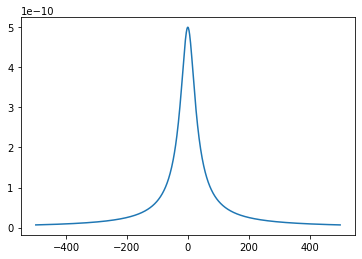

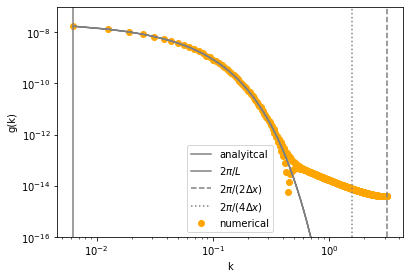

In [50]:
functionReal = lambda x,p: getFunction(x, *p)
functionFourier = lambda x,p: getFTFunction(x, *p)
constants = [5e-10, 26., 0.73]

n = 1000
n_pad = 0
KpcInCm = 3.086e21
deltax = 1
x1 = (-(n+n_pad)/2 + 1)*deltax;
grid = np.arange(x1, x1+(n)*deltax, deltax)
MaxX = np.max(grid)
MaxX = grid[-1]-grid[0]
spacing = deltax
print('Max value x direction', MaxX)
print('Spacing x values', MaxX)
grid, samples = functionReal(grid, constants)

factor = np.sqrt(n/(2*np.pi))*deltax*np.exp(-2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n+n_pad))
transform = np.fft.fft(samples, norm='ortho') * factor
ks = np.fft.fftfreq(n, d = deltax)*2*np.pi

plt.plot(*functionReal(grid,constants))


fig = plt.figure()
ax = plt.axes([0.15,0.15,0.8,.8])
ax.plot(abs(ks), abs(functionFourier(ks,constants)[1])**1, c='gray', label='analyitcal')
ax.scatter(*np.array([ks,abs(transform)**1]), c='orange', label='numerical')
plt.axvline(x=2*np.pi/MaxX, label=r'$2\pi/L$', c='grey')
plt.axvline(x=2*np.pi/spacing/2, label=r'$2\pi/(2\Delta x)$', c='grey', ls='--')#can probe scales 2*dx
plt.axvline(x=2*np.pi/spacing/4, label=r'$2\pi/(4\Delta x)$', c='grey', ls=':')#can probe scales 2*dx
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('g(k)')
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
print(labels)
labels = ['%s'%l for l in labels]
ax.set_xticklabels(labels)
ax.set_ylim([1e-16,1e-7])
ax.legend()
fig.savefig('TestingFourierAnalyticsPressureProfileGXPython.pdf', dpi=450)
plt.show()


In [14]:
import scipy.special
def phi(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-1/2.*x**2)
def Phi(x):
    return 1/2.*(1+scipy.special.erf(x/np.sqrt(2)))
def getFunction(x, mu, sigma, a, b):
    return x, phi((x-mu)/sigma)/(sigma*(Phi((b-mu)/sigma)-Phi((a-mu)/sigma)))
def getFTFunction(ks, mu, sigma, a, b):
    return ks, np.exp(np.complex(0,1)*mu*ks-sigma**2*ks**2/2)/(np.sqrt(2*np.pi)*np.sqrt(1/(sigma**2))*sigma*(1/2.*(-1-scipy.special.erf((a-mu)/(np.sqrt(2)*sigma)))+1/2.*(1+scipy.special.erf((b-mu)/(np.sqrt(2)*sigma)))))

In [ ]:
functionReal = lambda x,p: getFunction(x, *p)
functionFourier = lambda x,p: getFTFunction(x, *p)
constants = [5e-10, 26., 0.73]
constants = [2, 1, 2, 4]
n = 100
n_pad = 0
KpcInCm = 3.086e21
deltax = 1.8; #1e3/float(n+n_pad)
x1 = 0;
x1 = (-(n+n_pad)/2 + 1)*deltax;
grid = np.arange(x1, x1+(n+n_pad)*deltax, deltax)
# print(grid)
grid, samples = functionReal(grid, constants)
# samples[n_pad/2:n+n_pad/2]
# [0]*int(n_pad/2)+list(np.array(samples)[int(n_pad/2):int(n+int(n_pad/2))])+[0]*int(n_pad/2)
#samples = np.array([0]*int(n_pad/2+1)+list(np.array(samples)[int(n_pad/2):int(n+int(n_pad/2))-1])+[0]*int(n_pad/2))
# samples = np.array([0]*int(n_pad)+list(np.array(samples)[n:]))
# print(np.size(samples[samples!=0]),np.size(samples[samples==0]))
# print(samples)
# print(samples)
factorNeg = np.sqrt(n/(2*np.pi))*deltax*np.exp(-2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n_pad+n))
factor = np.sqrt(n/(2*np.pi))*deltax*np.exp(-2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n+n_pad))
factorSimpl = np.sqrt(n/(2*np.pi))*deltax

transform = np.fft.fft(samples, norm='ortho') *factor #fft/sqrt(n)*sqrt(n)*L/n
freq = np.fft.fftfreq(n+n_pad, d = deltax)*2*np.pi

# np.sqrt(n/(2.*np.pi)*deltax**2), abs(factor), 
plt.plot(*functionReal(grid,constants))
import matplotlib.pyplot as plt
plt.figure()
ax = plt.axes([0.1,0.1,0.8,.8])
ax.plot(ks, abs(f1D)**1)
ax.scatter(*np.array([freq,abs(transform)**1]))

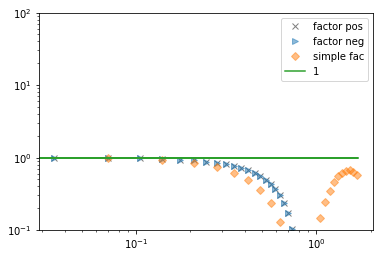

In [277]:

# plt.hist((functionFourier(freq,constants)[1]/(transform+functionFourier(freq,constants)[1])*2).real,bins=100)
# plt.axvline(x=1,color='red',alpha=0.4)
alpha=0.5
plt.plot(freq,functionFourier(freq,constants)[1].real/transform.real,'x',alpha=alpha,label='factor pos',color='black')
plt.plot(freq,functionFourier(freq,constants)[1].real/(transform.real/factor.real*factorNeg.real),'>',alpha=alpha,label='factor neg')
plt.plot(freq,functionFourier(freq,constants)[1].real/(transform.real/factor.real*factorSimpl),'D',alpha=alpha,label='simple fac')
plt.plot(freq,[1]*np.size(freq),label=1)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylim([1e-1,1e2])
grid;

(0.1, 10.0)

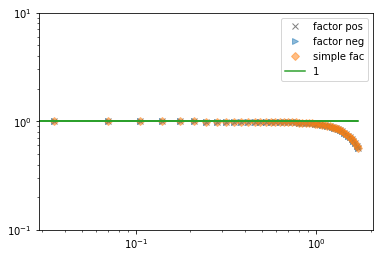

In [278]:
# transform = np.fft.fft(samples) /np.sqrt(n)*factor
# freq = np.fft.fftfreq(n, d = deltax)*2*np.pi
# plt.hist((functionFourier(freq,constants)[1]/(transform+functionFourier(freq,constants)[1])*2).real,bins=100)
# plt.axvline(x=1,color='red',alpha=0.4)
alpha=0.5
plt.plot(freq,abs(functionFourier(freq,constants)[1]/abs(transform)),'x',alpha=alpha,label='factor pos',color='black')
plt.plot(freq,abs(functionFourier(freq,constants)[1]/(transform/factor*factorNeg)),'>',alpha=alpha,label='factor neg')
plt.plot(freq,abs(functionFourier(freq,constants)[1]/(transform/factor*factorSimpl)),'D',alpha=alpha,label='simple fac')
plt.plot(freq,[1]*np.size(freq),label=1)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylim([1e-1,1e1])

In [279]:
ks, f1D = functionFourier(abs(freq), constants)

/home/kristian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


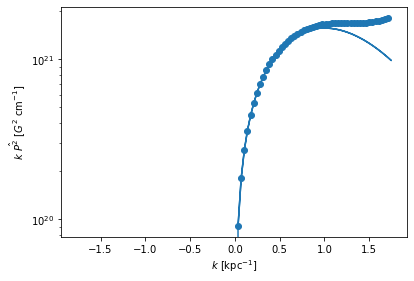

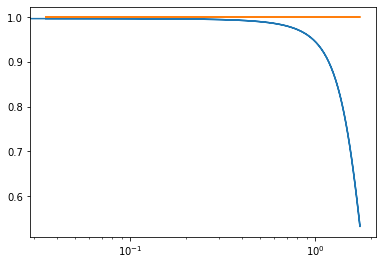

In [280]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.axes([0.1,0.1,0.8,.8])
ax.plot(ks, KpcInCm**1*abs(f1D)**1*ks**1)
ax.scatter(*np.array([freq, KpcInCm**1*freq**1*abs(transform)**1]))
# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k\ [\mathrm{kpc}^{-1}]$')
plt.ylabel(r'$k\ \hat{P^2}\ [G^2\ \mathrm{cm}^{-1}]$')
plt.figure()
ax = plt.axes([0.1,0.1,0.8,.8])
ax.plot(ks, abs(f1D)/abs(transform))
ax.plot(ks, abs(ks)/abs(freq))
plt.xscale('log')
#ax.scatter(*np.array([freq, KpcInCm**1*freq**1*abs(transform)**1]))
# plt.show()

## 3D

In [54]:
import numpy as np
import auxiliary_functions as aux

couldnt import gadget!
[100, 150] [0.5, 0.5, 0.5] [1.0, 1.0, 1.0]


In [55]:
def getFunction(x, y, z):
    return np.sqrt(x**2+y**2+z**2), np.exp(-(x**2+y**2+z**2))
def getFourierFunction(kx, ky, kz):
    return np.sqrt(kx**2+ky**2+kz**2), (1./(2*np.sqrt(2)))*np.exp(-(kx**2+ky**2+kz**2)/4)

In [127]:
# functionReal = lambda x,p: getFunction(x, *p)
# functionFourier = lambda x,p: getFourierFunction(x, *p)
functionReal = lambda x: getFunction(*x)
functionFourier = lambda x: getFourierFunction(*x)
# constants = [5e-10, 26., 0.73]
n = 100;
NDim = 3
KpcInCm = 1.#3.086e21
deltax = 10**(2)/float(n);
x1 = 0;
x1 = (-n/2 + 1)*deltax;
grid = np.arange(x1, x1+(n)*deltax, deltax)
grid = np.meshgrid(grid,grid,grid)
gridPlot, samples = functionReal(grid)
factor = np.sqrt(n/(2*np.pi))*np.exp(2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n))*deltax
factor = np.meshgrid(factor,factor,factor)
factor = factor[0]*factor[1]*factor[2]
print(np.sort(gridPlot.flatten()))

[ 0.          1.          1.         ... 86.02906486 86.02906486
 86.60254038]


$n=200 \\
\delta_x=\frac{10^3}{n} \\
x_1=\left(-\frac{n}{2}+1\right)\delta_x \\
x = x_1,\ x_1+(1)\delta_x,\ x_1+(2)\delta_x+,\ ...,\ +(n-1)\delta_x \\
samples = function(x) \\
fac = \sqrt{\frac{n}{2\pi}}\exp\left(\frac{2\pi i x_1}{n \delta_x}\ \left(0,\ 1,\ ...,\ n-1\right)\right) \delta_x \sqrt{\frac{n}{2\pi}}\exp\left(\frac{2\pi i x_1}{n \delta_y}\ \left(0,\ 1,\ ...,\ n-1\right)\right) \delta_y
\sqrt{\frac{n}{2\pi}}\exp\left(\frac{2\pi i x_1}{n \delta_z}\ \left(0,\ 1,\ ...,\ n-1\right)\right) \delta_z\\
$

In [128]:
transform = np.fft.fftn(samples)*factor /np.sqrt(n)**NDim
transformNoFac = np.fft.fftn(samples) /np.sqrt(n)**NDim #*factor
freq = np.fft.fftfreq(n, d = deltax)*2*np.pi
gridFreq = np.meshgrid(freq,freq,freq)
freqAna, transformAna = functionFourier(gridFreq)
# print(np.shape(samples),np.shape(factor))
#factor = np.sqrt(n/(2*np.pi))*np.exp(2*np.pi*np.complex(0,1)*x1/(n*deltax)*np.arange(0, n))*deltax

In [129]:
import scipy.stats
MIN = np.min(abs(freqAna)[abs(freqAna)>0])
MAX = np.max(abs(freqAna))
binN = 30
BINS = 10**np.linspace(np.log10(MIN), np.log10(MAX), binN)
RadProf, bin_edges, binnumber = scipy.stats.binned_statistic(freqAna.flatten(),
                                np.abs(transform.flatten()), statistic='mean', bins=BINS,range=[MIN,MAX])
RadProf = np.nan_to_num(RadProf)
bin_centers = bin_edges[0] + np.diff(bin_edges)/2.

In [130]:
import scipy.stats
MIN = np.min(abs(freqAna)[abs(freqAna)>0])
MAX = np.max(abs(freqAna))
binN = 30
BINS = 10**np.linspace(np.log10(MIN), np.log10(MAX), binN)
RadProfNoFac, bin_edges, binnumber = scipy.stats.binned_statistic(freqAna.flatten(),
                                np.abs(transformNoFac.flatten()), statistic='mean', bins=BINS,range=[MIN,MAX])
RadProfNoFac = np.nan_to_num(RadProfNoFac)
bin_centersNoFac = bin_edges[0] + np.diff(bin_edges)/2.

In [131]:
import scipy.stats
MIN = np.min(abs(freqAna)[abs(freqAna)>0])
MAX = np.max(abs(freqAna))
binN = 30
BINS = 10**np.linspace(np.log10(MIN), np.log10(MAX), binN)
RadProfAna, bin_edgesAna, binnumber = scipy.stats.binned_statistic(freqAna.flatten(),
                                np.abs(transformAna.flatten()), statistic='mean', bins=BINS,range=[MIN,MAX])
RadProfAna = np.nan_to_num(RadProfAna)
bin_centersAna = bin_edgesAna[0] + np.diff(bin_edgesAna)/2.

$
\hat{x}=\frac{\mathrm{FT}(samples*fac)}{\sqrt{n}}
$

0.06805641660783017 0.45077603728398363 0.001032829573126008 0.35331495835609567


/home/kristian/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


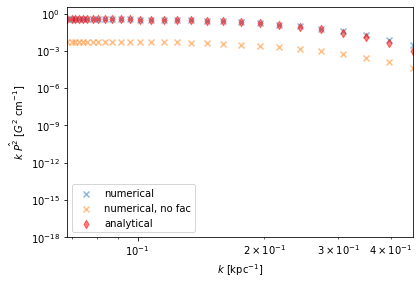

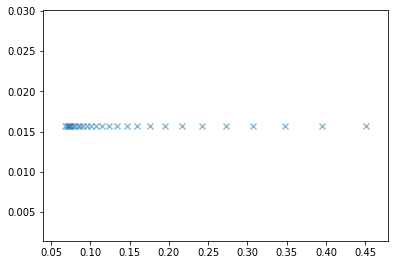

array([0.06805642, 0.06892528, 0.06993863, 0.07112051, 0.07249894,
       0.07410661, 0.07598163, 0.07816848, 0.08071901, 0.08369369,
       0.08716308, 0.09120944, 0.09592872, 0.10143282, 0.10785228,
       0.11533932, 0.12407147, 0.1342558 , 0.14613382, 0.15998718,
       0.17614441, 0.19498863, 0.2169667 , 0.24259979, 0.27249574,
       0.30736348, 0.34802983, 0.39545912, 0.45077604])

In [132]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.axes([0.1,0.1,0.8,.8])
ax.scatter(bin_centers, abs(RadProf)**1, marker='x', alpha=0.5, label='numerical')
ax.scatter(bin_centersNoFac, abs(RadProfNoFac)**1, marker='x', alpha=0.5, label='numerical, no fac')
ax.scatter(*np.array([bin_centersAna, abs(RadProfAna)**1]), marker='d',color='red', alpha=0.5, label='analytical')
# ax1 = plt.subplot(311)
# ax1.scatter(bin_centers, abs(RadProf)**1)
# ax2 = plt.subplot(312)
# ax2.scatter(*np.array([bin_centersAna, abs(RadProfAna)**1]), color='red')
# ax2 = plt.subplot(313)
# ax2.scatter(*np.array([bin_centersAna, abs(RadProfAna)**1]), color='red')
Xmin=np.min([np.min(bin_centers), np.min(bin_centersAna)])
Xmax=np.max([np.max(bin_centers), np.max(bin_centersAna)])
try:
    Ymin=np.min([np.min(RadProf[RadProf>0]), np.min(RadProfAna[RadProfAna>0])])
except:
    Ymin=None
Ymax=np.max([np.max(RadProf), np.max(RadProfAna)])
for ax in [ax]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$k\ [\mathrm{kpc}^{-1}]$')
    ax.set_ylabel(r'$k\ \hat{P^2}\ [G^2\ \mathrm{cm}^{-1}]$')
    ax.set_xlim([Xmin,Xmax])
    ax.set_ylim([1e-18,1e1*Ymax])
print(Xmin,Xmax,Ymin,Ymax)
# plt.xlim([Xmin,Xmax])
# plt.ylim([Ymin,Ymax])
plt.legend()

plt.figure()
ax = plt.axes([0.1,0.1,0.8,.8])
ax.scatter(bin_centers, abs(RadProfNoFac)**1/abs(RadProf)**1, marker='x', alpha=0.5, label='no fac/ fac')

plt.show()
bin_centers